In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
#using meshgrid

grid_count = 15
coordinates = np.linspace(-6371, 6371, grid_count)
x_coordinates, y_coordinates, z_coordinates = np.meshgrid(coordinates, coordinates, coordinates)

earth_grid = np.zeros((grid_count**3, 3))
index = 0

for i in range(grid_count):
    for j in range(grid_count):
        for k in range(grid_count):
            if x_coordinates[i, j, k]**2 + y_coordinates[i, j, k]**2 + z_coordinates[i, j, k]**2 <= 6371**2:
                earth_grid[index] = np.array([x_coordinates[i, j, k], y_coordinates[i, j, k], z_coordinates[i, j, k]])
                index += 1

earth_grid = earth_grid[:index]


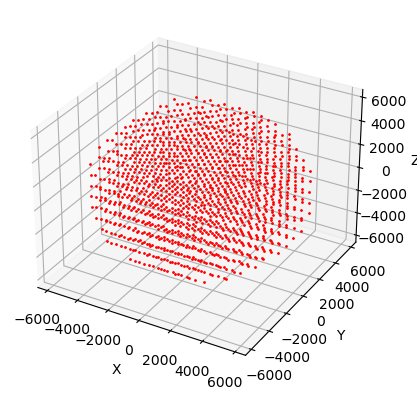

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in earth_grid:
    x, y, z = point
    ax.scatter(x, y, z, c='r', marker='o', s = 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set limits for each axis
ax.set_xlim([-6371, 6371])  # Set x-axis limits
ax.set_ylim([-6371, 6371])  # Set y-axis limits
ax.set_zlim([-6371, 6371])  # Set z-axis limits

plt.show()

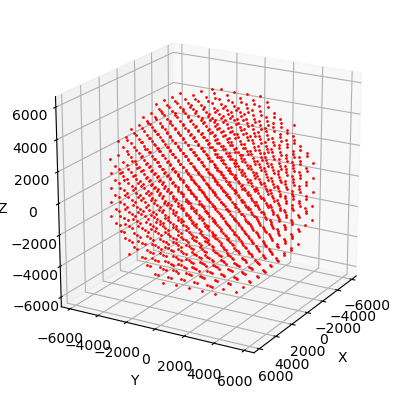

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a numpy array 'earth_grid' containing points on the sphere

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in earth_grid:
    x, y, z = point
    ax.scatter(x, y, z, c='r', marker='o', s=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set limits for each axis
ax.set_xlim([-6371, 6371])  # Set x-axis limits
ax.set_ylim([-6371, 6371])  # Set y-axis limits
ax.set_zlim([-6371, 6371])  # Set z-axis limits

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])

# Adjust the viewing angle
ax.view_init(elev=20, azim=30)

plt.savefig('earth_grid_points.png')
plt.show()


In [8]:
core_radius = 3486
mantle_crust_mask = (earth_grid[:, 0]**2 + earth_grid[:, 1]**2 + earth_grid[:, 2]**2 >= core_radius**2)

mantle_crust_grid = earth_grid[mantle_crust_mask]
core_grid = earth_grid[~mantle_crust_mask]

# Reshape the arrays to have three columns
mantle_crust_grid = mantle_crust_grid.reshape(-1, 3)
core_grid = core_grid.reshape(-1, 3)

print(mantle_crust_grid)

[[    0.         -6371.             0.        ]
 [-2730.42857143 -5460.85714286 -1820.28571429]
 [-2730.42857143 -5460.85714286  -910.14285714]
 ...
 [ 2730.42857143  5460.85714286   910.14285714]
 [ 2730.42857143  5460.85714286  1820.28571429]
 [    0.          6371.             0.        ]]


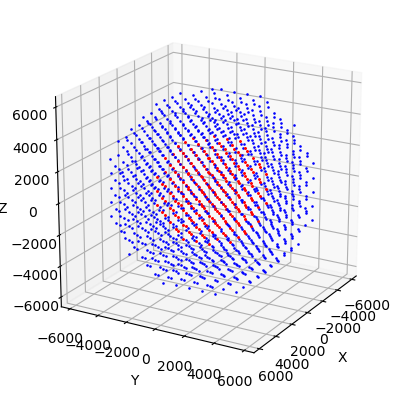

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for point in mantle_crust_grid:
    x, y, z = point
    ax.scatter(x, y, z, c='b', marker='.', s=3)
    
for point in core_grid:
    x, y, z = point
    ax.scatter(x, y, z, c='r', marker='.', s=5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set limits for each axis
ax.set_xlim([-6371, 6371])
ax.set_ylim([-6371, 6371])
ax.set_zlim([-6371, 6371])

# Set aspect ratio
ax.set_box_aspect([1, 1, 1])

# Adjust the viewing angle
ax.view_init(elev=20, azim=30)
plt.savefig('core_mantle.png')

plt.show()